In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
import os
sys.path.append(os.path.abspath('../..'))
from project_paths import PROJECT_ROOT
from Paper.figure_scripts import common

In [2]:
data = np.load(f'{PROJECT_ROOT}Data/LPSE/Speedup/ResCNN_grid.npz')
speedup = data['speedup']
n_filters = [2, 4, 8, 16, 32]
n_samples = data["n_samples"]
labels = ["f64", "f32", "f16", "bf16"]

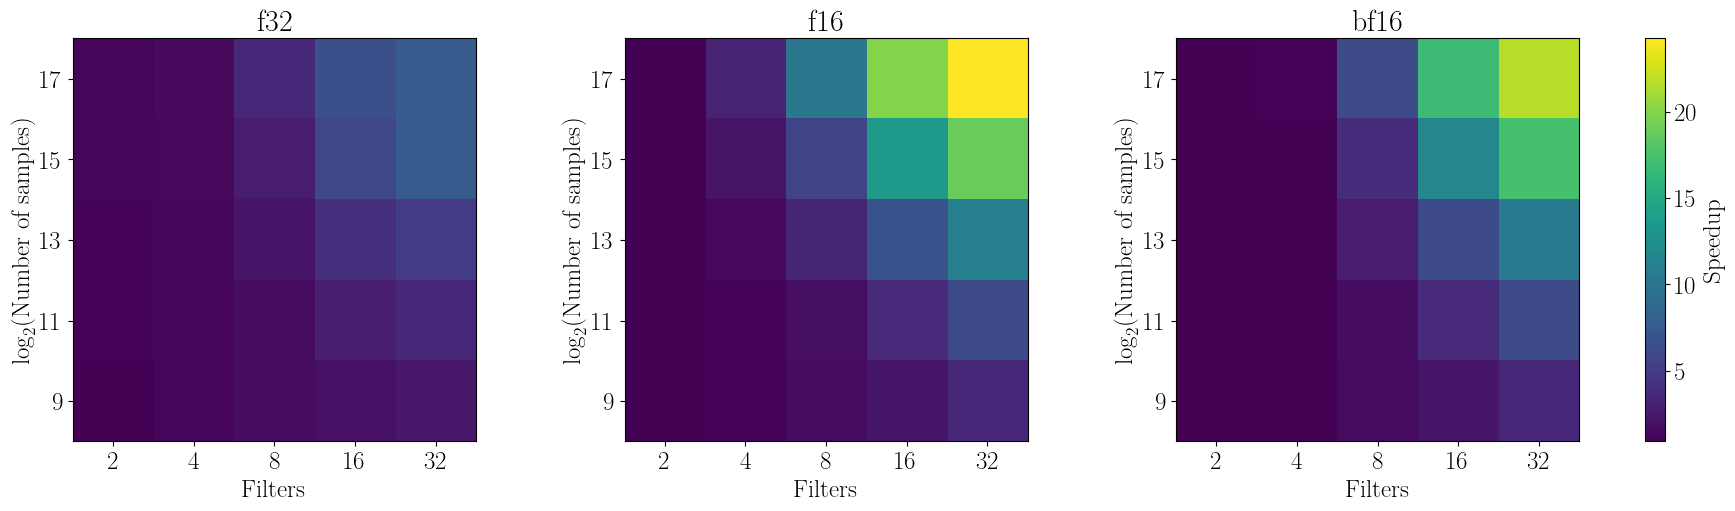

In [3]:
vmin = min(im.min() for im in speedup)
vmax = max(im.max() for im in speedup)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

for d, ax in enumerate(axes):
    im = ax.imshow(speedup[d+1].T, cmap="viridis", origin="lower", vmin=vmin, vmax=vmax)
    ax.set_title(labels[d+1])
    ax.set_xticks(range(len(n_filters)), n_filters)
    ax.set_yticks(range(len(n_samples)), np.asarray(np.log2(n_samples), dtype=int))
    ax.set_xlabel('Filters')
    ax.set_ylabel(r"$\log_2(\text{Number of samples})$")

cbar = fig.colorbar(im, ax=axes, orientation="vertical", fraction=0.014, pad=0.04)
cbar.set_label("Speedup")

plt.savefig("figures/speedup_grid_ResCNN.pdf")
plt.show()